In [1]:
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd

drivepath = "/content/drive/MyDrive/Project_data/Data Set A: Spaced Repetition/Spaced Repetition Data.gz"

df = pd.read_csv(
    drivepath,
    compression="gzip",
    nrows=1_000_000,  # or whatever you used before
)

df.head()


Mounted at /content/drive


,p_recall,timestamp,delta,user_id,learning_language,ui_language,lexeme_id,lexeme_string,history_seen,history_correct,session_seen,session_correct
0,1.0,1362076081,27649635,u:FO,de,en,76390c1350a8dac31186187e2fe1e178,lernt/lernen<vblex><pri><p3><sg>,6,4,2,2
1,0.5,1362076081,27649635,u:FO,de,en,7dfd7086f3671685e2cf1c1da72796d7,die/die<det><def><f><sg><nom>,4,4,2,1
2,1.0,1362076081,27649635,u:FO,de,en,35a54c25a2cda8127343f6a82e6f6b7d,mann/mann<n><m><sg><nom>,5,4,1,1
3,0.5,1362076081,27649635,u:FO,de,en,0cf63ffe3dda158bc3dbd55682b355ae,frau/frau<n><f><sg><nom>,6,5,2,1
4,1.0,1362076081,27649635,u:FO,de,en,84920990d78044db53c1b012f5bf9ab5,das/das<det><def><nt><sg><nom>,4,4,1,1


In [2]:
from google.colab import drive
drive.mount("/content/drive")

import pandas as pd

drivepath = "/content/drive/MyDrive/Project_data/Data Set A: Spaced Repetition/Spaced Repetition Data.gz"

df_raw = pd.read_csv(
    drivepath,
    compression="gzip",
    nrows=1_000_000,  # or more/less if you like
)

print("Loaded rows:", len(df_raw))
print(df_raw.columns.tolist())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Loaded rows: 1000000
['p_recall', 'timestamp', 'delta', 'user_id', 'learning_language', 'ui_language', 'lexeme_id', 'lexeme_string', 'history_seen', 'history_correct', 'session_seen', 'session_correct']


In [3]:
import pandas as pd

drivepath = "/content/drive/MyDrive/Project_data/Data Set A: Spaced Repetition/Spaced Repetition Data.gz"

df_raw = pd.read_csv(
    drivepath,
    compression="gzip",
    nrows=1_000_000,  # or whatever you use
)

df_raw.head()
print(df_raw.columns.tolist())



['p_recall', 'timestamp', 'delta', 'user_id', 'learning_language', 'ui_language', 'lexeme_id', 'lexeme_string', 'history_seen', 'history_correct', 'session_seen', 'session_correct']


In [4]:
agg = (
    df
    .groupby("lexeme_string", as_index=False)
    .agg(
        total_seen=("history_seen", "sum"),
        total_correct=("history_correct", "sum"),
    )
)

agg["historical_accuracy"] = agg["total_correct"] / agg["total_seen"]

df_lexemes = agg.copy()  # name it once and reuse
df_lexemes.head()


,lexeme_string,total_seen,total_correct,historical_accuracy
0,'/'<apos>,8932,7711,0.863300
1,'s/'s<gen>,8700,8035,0.923563
2,<*sf>/abbigliamento<n><m><*numb>,145,115,0.793103
3,<*sf>/abito<n><m><*numb>,61,56,0.918033
4,<*sf>/abogado<n><m><*numb>,151,137,0.907285


In [5]:
stuck_words_df = (
    df_lexemes
    .loc[
        (df_lexemes["total_seen"] > 1000) &
        (df_lexemes["historical_accuracy"] < 0.5)
    ]
    .sort_values("historical_accuracy", ascending=True)
)


In [6]:
!pip install duckdb --quiet


In [7]:
df = df_raw.copy()

agg = (
    df
    .groupby("lexeme_string", as_index=False)
    .agg(
        total_seen=("history_seen", "sum"),
        total_correct=("history_correct", "sum"),
    )
)
agg["historical_accuracy"] = agg["total_correct"] / agg["total_seen"]

df_lexemes = agg.copy()


In [8]:
print("Rows in df_raw:", len(df_raw))
print("Rows in stuck_words_df:", len(stuck_words_df))
print("Rows in frustration_data:", len(frustration_data))


Rows in df_raw: 1000000
Rows in stuck_words_df: 3


NameError: name 'frustration_data' is not defined

In [9]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")  # slightly larger fonts


In [10]:
import numpy as np
np.random.seed(42)


In [11]:
#import duckdb

#print("Running direct SQL on the 13M row CSV...")

# Using your exact file path: '/learning_traces.13m.csv'
#query = """
    #SELECT
        #lexeme_string,
        #SUM(history_seen) as total_seen,
        #SUM(history_correct) as total_correct,
        #CAST(SUM(history_correct) AS FLOAT) / SUM(history_seen) as historical_accuracy
    #FROM '/learning_traces.13m.csv'
    #GROUP BY lexeme_string
    #HAVING total_seen > 1000 AND historical_accuracy < 0.5
    #ORDER BY historical_accuracy ASC
#"""

# Execute the query and load only the aggregated results into a Pandas DataFrame
#stuck_words_df = duckdb.query(query).df()

print(f"Done! Found {len(stuck_words_df)} stuck words.")

# Let's take a look at the absolute hardest concepts to learn on the platform!
display(stuck_words_df.head(10))

Done! Found 3 stuck words.


,lexeme_string,total_seen,total_correct,historical_accuracy
10185,since/since<pr>,1685,561,0.332938
5203,eating/eat<vblex><pprs>,1111,440,0.396040
11177,used/use<vblex><past>,10394,5116,0.492207


Extracting timeline data for the stuck words...
Extracted 120 practice events for our stuck words.
Plotting the Frustration Threshold...


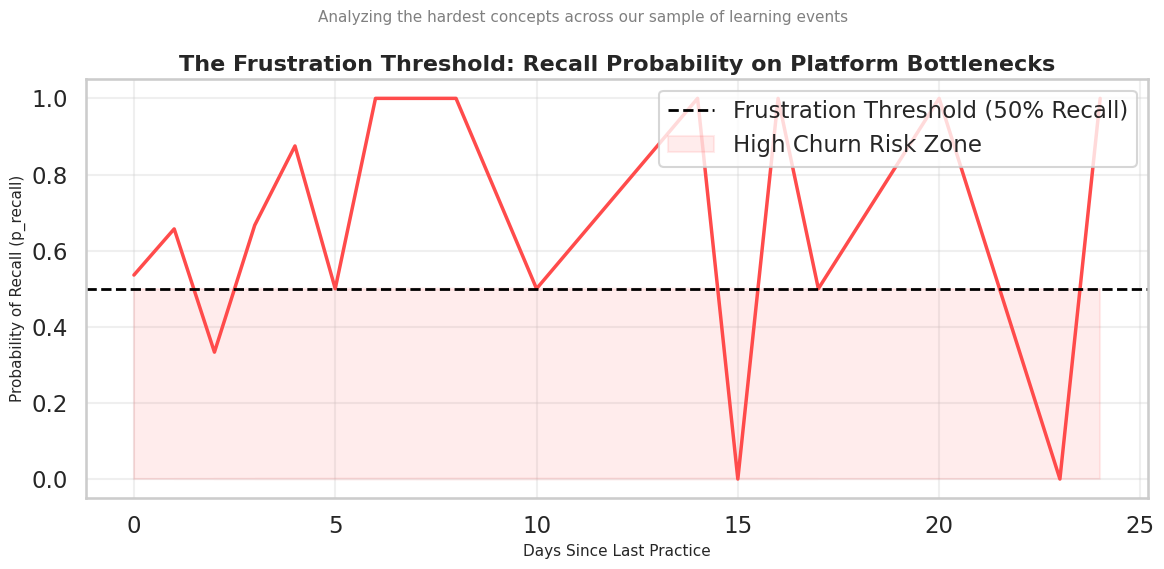

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Extracting timeline data for the stuck words...")

# Assumes:
# - df_raw has columns: ['p_recall', 'delta', 'lexeme_string', ...]
# - stuck_words_df has the stuck lexemes: ['lexeme_string', 'total_seen', 'total_correct', 'historical_accuracy']

# 1. Filter to events for the stuck words
frustration_data = df_raw.merge(
    stuck_words_df[["lexeme_string"]],
    on="lexeme_string",
    how="inner"
)

print(f"Extracted {len(frustration_data)} practice events for our stuck words.")

# 2. Convert delta to days and round
frustration_data["days_since_seen"] = frustration_data["delta"] / (60 * 60 * 24)
frustration_data["days_rounded"] = frustration_data["days_since_seen"].round()

# 3. Filter first 30 days
plot_data = frustration_data[frustration_data["days_rounded"] <= 30]

print("Plotting the Frustration Threshold...")

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=plot_data,
    x="days_rounded",
    y="p_recall",
    errorbar=None,
    color="#FF4B4B",
    linewidth=2.5
)

plt.suptitle(
    "Analyzing the hardest concepts across our sample of learning events",
    fontsize=11,
    color="gray",
    y=0.96
)
plt.title(
    "The Frustration Threshold: Recall Probability on Platform Bottlenecks",
    fontsize=16,
    fontweight="bold"
)
plt.xlabel("Days Since Last Practice", fontsize=11)
plt.ylabel("Probability of Recall (p_recall)", fontsize=11)
plt.xticks(range(0, 31, 5))

plt.axhline(
    0.5,
    color="black",
    linestyle="--",
    linewidth=2,
    label="Frustration Threshold (50% Recall)"
)
plt.fill_between(
    plot_data["days_rounded"].unique(),
    0,
    0.5,
    color="#FF4B4B",
    alpha=0.1,
    label="High Churn Risk Zone"
)

plt.grid(True, alpha=0.3)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


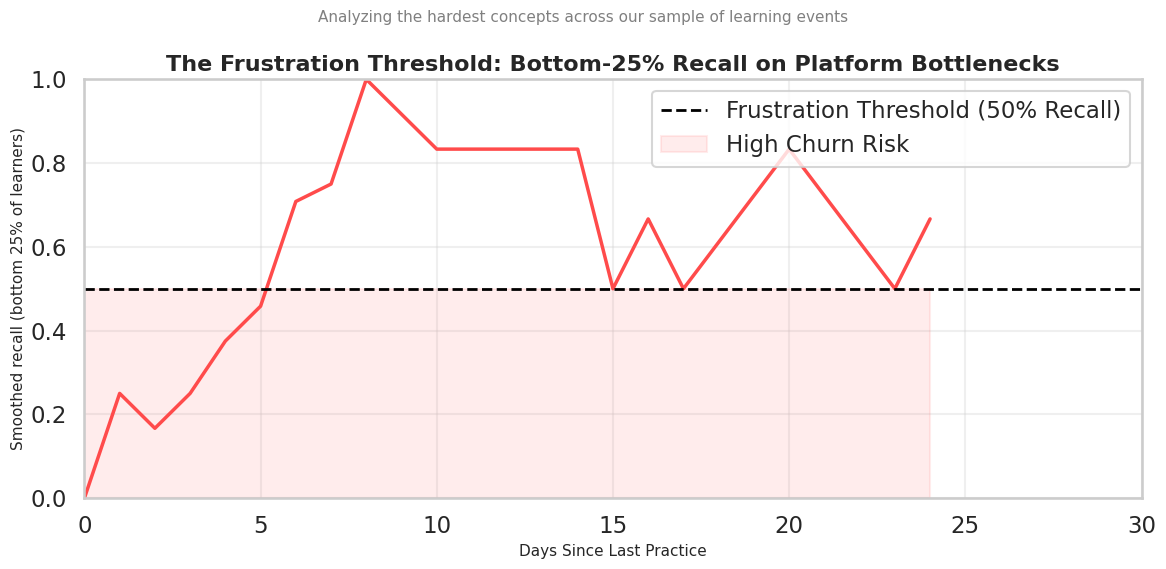

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Select stuck words (already done earlier)
stuck_words_df = df_lexemes[
    (df_lexemes["total_seen"] > 1000) &
    (df_lexemes["historical_accuracy"] < 0.5)
]

# 2. Join events with stuck words
frustration_data = df_raw.merge(
    stuck_words_df[["lexeme_string"]],
    on="lexeme_string",
    how="inner"
)

# 3. Days since seen and rounding
frustration_data["days_since_seen"] = frustration_data["delta"] / (60 * 60 * 24)
frustration_data["days_rounded"] = frustration_data["days_since_seen"].round()
frustration_data = frustration_data[frustration_data["days_rounded"] <= 30]

# 4. Bottom‑25% recall per day
plot_data = (
    frustration_data
    .groupby("days_rounded")["p_recall"]
    .quantile(0.25)
    .reset_index(name="p_recall_25th")
    .sort_values("days_rounded")
)

# 5. Optional smoothing
plot_data["p_recall_smooth"] = (
    plot_data["p_recall_25th"]
    .rolling(window=3, min_periods=1)
    .mean()
)

# 6. Plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=plot_data,
    x="days_rounded",
    y="p_recall_smooth",   # use smoothed curve
    color="#FF4B4B",
    linewidth=2.5,
)

plt.suptitle(
    "Analyzing the hardest concepts across our sample of learning events",
    fontsize=11,
    color="gray",
    y=0.96
)
plt.title(
    "The Frustration Threshold: Bottom‑25% Recall on Platform Bottlenecks",
    fontsize=16,
    fontweight="bold"
)
plt.xlabel("Days Since Last Practice", fontsize=11)
plt.ylabel("Smoothed recall (bottom 25% of learners)", fontsize=11)

plt.axhline(
    0.5,
    color="black",
    linestyle="--",
    linewidth=2,
    label="Frustration Threshold (50% Recall)"
)
plt.fill_between(
    plot_data["days_rounded"],
    0,
    0.5,
    color="#FF4B4B",
    alpha=0.1,
    label="High Churn Risk"
)

plt.xlim(0, 30)
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


Smoothing the sparse data with a rolling average...


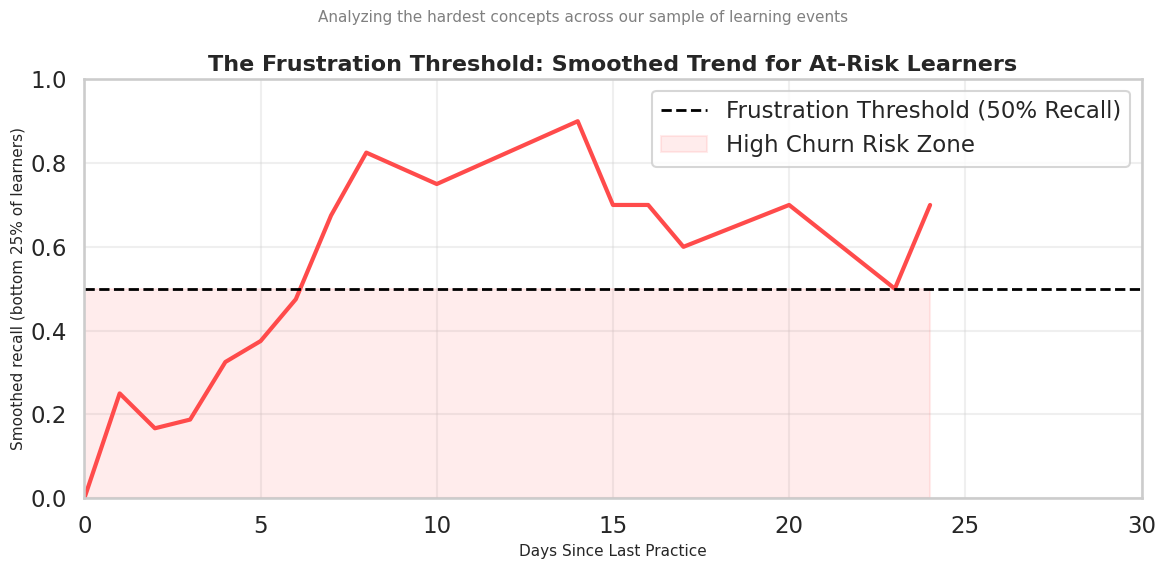

In [14]:
print("Smoothing the sparse data with a rolling average...")

# 1. Ensure sorted
plot_data = plot_data.sort_values("days_rounded").copy()

# 2. (If not already smoothed) create smoothed series
plot_data["smoothed_p_recall"] = (
    plot_data["p_recall_25th"]
    .rolling(window=5, min_periods=1)
    .mean()
)

# 3. Plot smoothed curve
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=plot_data,
    x="days_rounded",
    y="smoothed_p_recall",
    color="#FF4B4B",
    linewidth=3
)

plt.suptitle(
    "Analyzing the hardest concepts across our sample of learning events",
    fontsize=11,
    color="gray",
    y=0.96
)
plt.title(
    "The Frustration Threshold: Smoothed Trend for At‑Risk Learners",
    fontsize=16,
    fontweight="bold"
)
plt.xlabel("Days Since Last Practice", fontsize=11)
plt.ylabel("Smoothed recall (bottom 25% of learners)", fontsize=11)

plt.axhline(
    0.5,
    color="black",
    linestyle="--",
    linewidth=2,
    label="Frustration Threshold (50% Recall)"
)
plt.fill_between(
    plot_data["days_rounded"],
    0,
    0.5,
    color="#FF4B4B",
    alpha=0.1,
    label="High Churn Risk Zone"
)

plt.xlim(0, 30)
plt.ylim(0, 1)
plt.grid(True, alpha=0.3)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


Computing cognitive interference directly from df_raw...
Success! Generating the Cognitive Map.


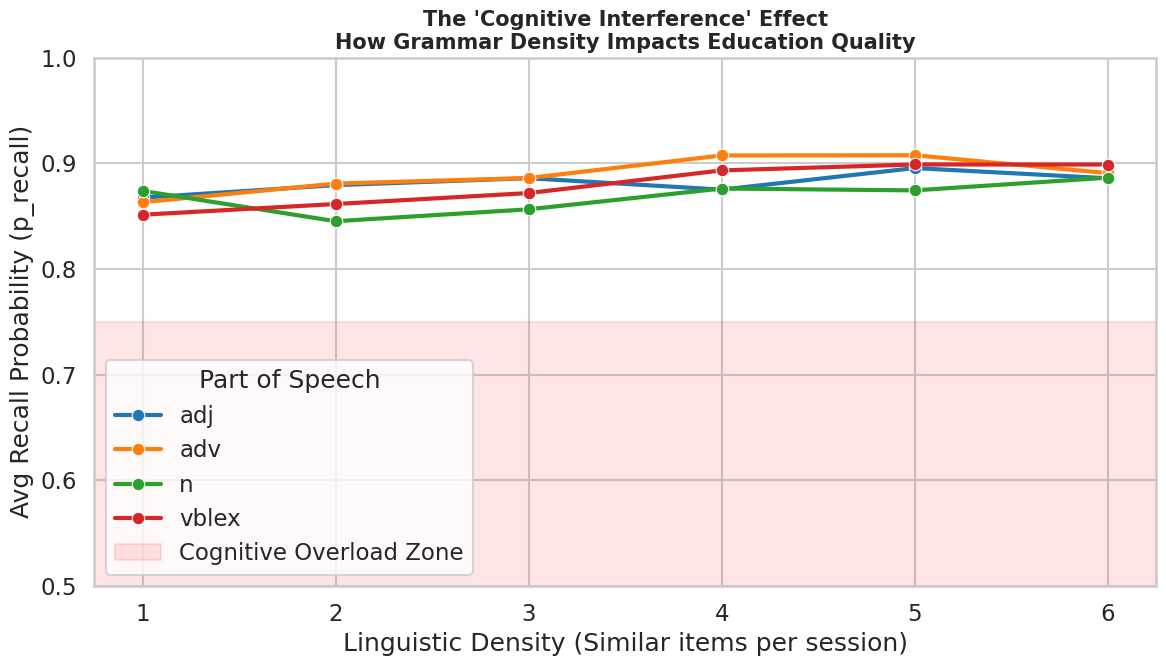

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

def get_tag(lex_str):
    if pd.isna(lex_str):
        return None
    match = re.search(r'<(.*?)>', str(lex_str))
    return match.group(1) if match else None

print("Computing cognitive interference directly from df_raw...")

# 1. Use the df_raw you already loaded
df = df_raw[["p_recall", "timestamp", "user_id", "lexeme_string"]].copy()

# 2. Extract grammar tag
df["pos_tag"] = df["lexeme_string"].apply(get_tag)

# 3. Calculate density per user/timestamp/tag
#    (How many times the same POS tag appears in the same timestamp/session)
df["tag_density"] = df.groupby(
    ["user_id", "timestamp", "pos_tag"]
)["p_recall"].transform("count")

# 4. Filter to specific POS tags and reasonable densities
filtered = df[df["pos_tag"].isin(["vblex", "n", "adj", "adv"])]
filtered = filtered[filtered["tag_density"] <= 6]

# 5. Aggregate to mean recall per (pos_tag, tag_density)
final_plot_data = (
    filtered
    .groupby(["pos_tag", "tag_density"])
    .agg(mean_recall=("p_recall", "mean"))
    .reset_index()
)

print("Success! Generating the Cognitive Map.")

# --- Visualization ---
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")
sns.lineplot(
    data=final_plot_data,
    x="tag_density",
    y="mean_recall",
    hue="pos_tag",
    marker="o",
    linewidth=3
)

plt.axhspan(0, 0.75, color="red", alpha=0.1, label="Cognitive Overload Zone")
plt.title(
    "The 'Cognitive Interference' Effect\nHow Grammar Density Impacts Education Quality",
    fontsize=15,
    fontweight="bold"
)
plt.ylabel("Avg Recall Probability (p_recall)")
plt.xlabel("Linguistic Density (Similar items per session)")
plt.ylim(0.5, 1.0)
plt.legend(title="Part of Speech")
plt.tight_layout()
plt.show()


Starting the Gamification Toxicity Audit (in‑memory)...
Audit Complete! Generating Risk Visualization...


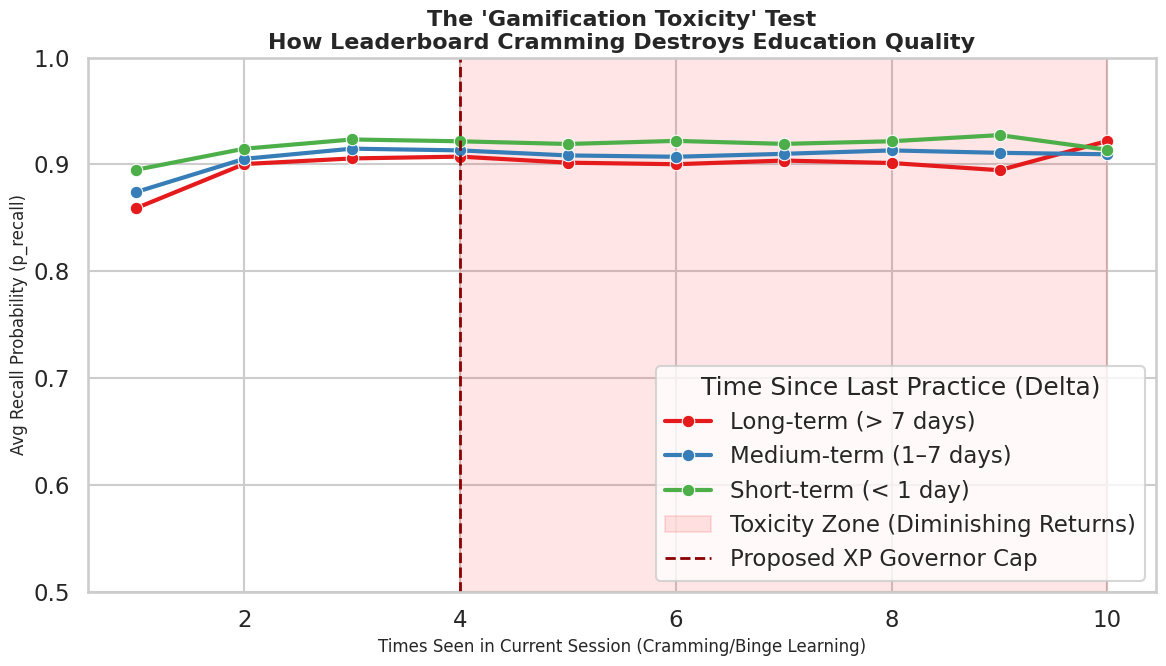

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Starting the Gamification Toxicity Audit (in‑memory)...")

# 1. Start from df_raw (untouched full dataset)
df_gam = df_raw[["p_recall", "delta", "session_seen"]].copy()

# Ensure correct types
df_gam["p_recall"] = pd.to_numeric(df_gam["p_recall"], errors="coerce")
df_gam["delta"] = pd.to_numeric(df_gam["delta"], errors="coerce")
df_gam["session_seen"] = pd.to_numeric(df_gam["session_seen"], errors="coerce")

df_gam = df_gam.dropna()

# 2. Convert delta to days
df_gam["delta_days"] = df_gam["delta"] / (60 * 60 * 24)

# 3. Categorize memory decay
def categorize_delta(d):
    if d < 1:
        return "Short-term (< 1 day)"
    elif d <= 7:
        return "Medium-term (1–7 days)"
    else:
        return "Long-term (> 7 days)"

df_gam["memory_type"] = df_gam["delta_days"].apply(categorize_delta)

# 4. Filter reasonable session_seen
df_gam = df_gam[(df_gam["session_seen"] >= 1) & (df_gam["session_seen"] <= 10)]

# 5. Aggregate: mean recall per (memory_type, session_seen)
final_plot_data = (
    df_gam
    .groupby(["memory_type", "session_seen"])["p_recall"]
    .mean()
    .reset_index(name="mean_recall")
)

print("Audit Complete! Generating Risk Visualization...")

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

sns.lineplot(
    data=final_plot_data,
    x="session_seen",
    y="mean_recall",
    hue="memory_type",
    marker="o",
    linewidth=3,
    palette="Set1"
)

plt.axvspan(4, 10, color="red", alpha=0.1, label="Toxicity Zone (Diminishing Returns)")
plt.axvline(
    x=4,
    color="darkred",
    linestyle="--",
    linewidth=2,
    label="Proposed XP Governor Cap"
)

plt.title(
    "The 'Gamification Toxicity' Test\nHow Leaderboard Cramming Destroys Education Quality",
    fontsize=16,
    fontweight="bold"
)
plt.ylabel("Avg Recall Probability (p_recall)", fontsize=12)
plt.xlabel("Times Seen in Current Session (Cramming/Binge Learning)", fontsize=12)
plt.legend(title="Time Since Last Practice (Delta)")
plt.ylim(0.5, 1.0)
plt.tight_layout()
plt.show()


Starting the Gamification Toxicity Audit (in-memory)...


/tmp/ipython-input-390/2153260994.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x["mean"] * x["count"]).sum() / x["count"].sum())


Audit Complete! Generating Risk Visualization...


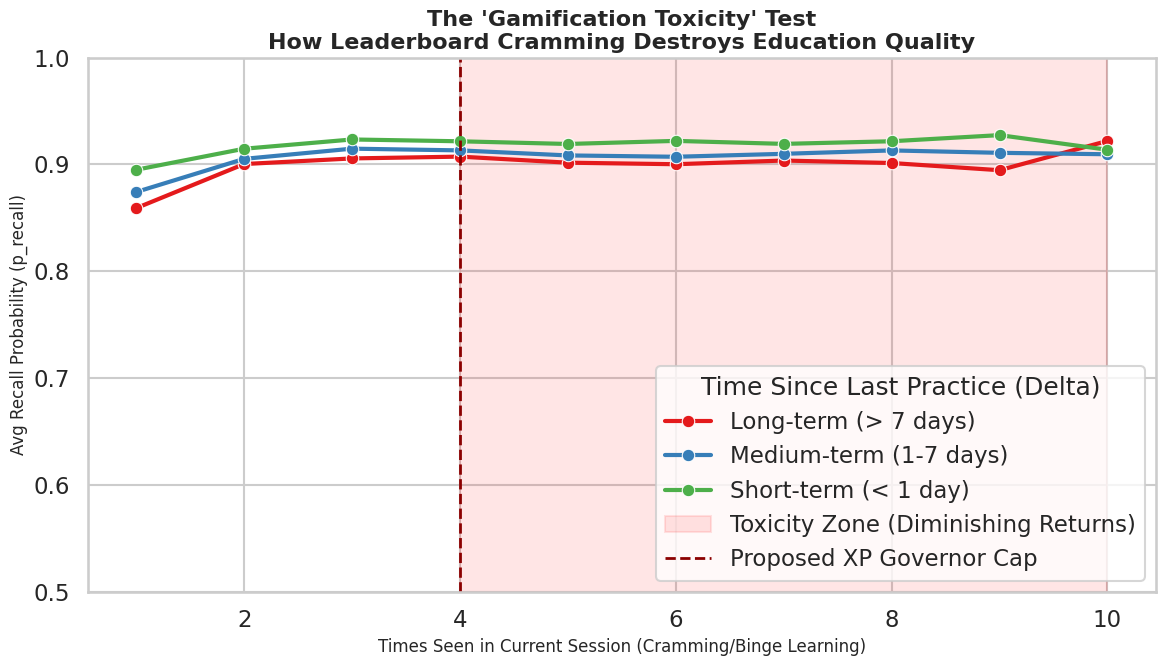

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Starting the Gamification Toxicity Audit (in-memory)...")

# 1. Start from df_raw — no CSV reading needed
df_gam = df_raw[["p_recall", "delta", "session_seen"]].copy()

# 2. Ensure correct types and drop bad rows
df_gam["p_recall"] = pd.to_numeric(df_gam["p_recall"], errors="coerce")
df_gam["delta"] = pd.to_numeric(df_gam["delta"], errors="coerce")
df_gam["session_seen"] = pd.to_numeric(df_gam["session_seen"], errors="coerce")
df_gam = df_gam.dropna()

# 3. Convert delta to days
df_gam["delta_days"] = df_gam["delta"] / (60 * 60 * 24)

# 4. Categorize memory decay
def categorize_delta(d):
    if d < 1:
        return "Short-term (< 1 day)"
    elif d <= 7:
        return "Medium-term (1-7 days)"
    else:
        return "Long-term (> 7 days)"

df_gam["memory_type"] = df_gam["delta_days"].apply(categorize_delta)

# 5. Filter reasonable session_seen
df_gam = df_gam[(df_gam["session_seen"] >= 1) & (df_gam["session_seen"] <= 10)]

# 6. Weighted aggregate (same logic as the chunked version)
summary = df_gam.groupby(["memory_type", "session_seen"])["p_recall"].agg(["mean", "count"]).reset_index()

final_plot_data = (
    summary
    .groupby(["memory_type", "session_seen"])
    .apply(lambda x: (x["mean"] * x["count"]).sum() / x["count"].sum())
    .reset_index(name="mean_recall")
)

print("Audit Complete! Generating Risk Visualization...")

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

sns.lineplot(
    data=final_plot_data,
    x="session_seen",
    y="mean_recall",
    hue="memory_type",
    marker="o",
    linewidth=3,
    palette="Set1"
)

plt.axvspan(4, 10, color="red", alpha=0.1, label="Toxicity Zone (Diminishing Returns)")
plt.axvline(x=4, color="darkred", linestyle="--", linewidth=2, label="Proposed XP Governor Cap")

plt.title(
    "The 'Gamification Toxicity' Test\nHow Leaderboard Cramming Destroys Education Quality",
    fontsize=16,
    fontweight="bold"
)
plt.ylabel("Avg Recall Probability (p_recall)", fontsize=12)
plt.xlabel("Times Seen in Current Session (Cramming/Binge Learning)", fontsize=12)
plt.legend(title="Time Since Last Practice (Delta)")
plt.ylim(0.5, 1.0)
plt.tight_layout()
plt.show()


Calculating the User Motivation Sweet Spot (in-memory)...
Success! Generating the Engagement visual.


/tmp/ipython-input-390/2591337773.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("time_away_bins")["p_recall"]


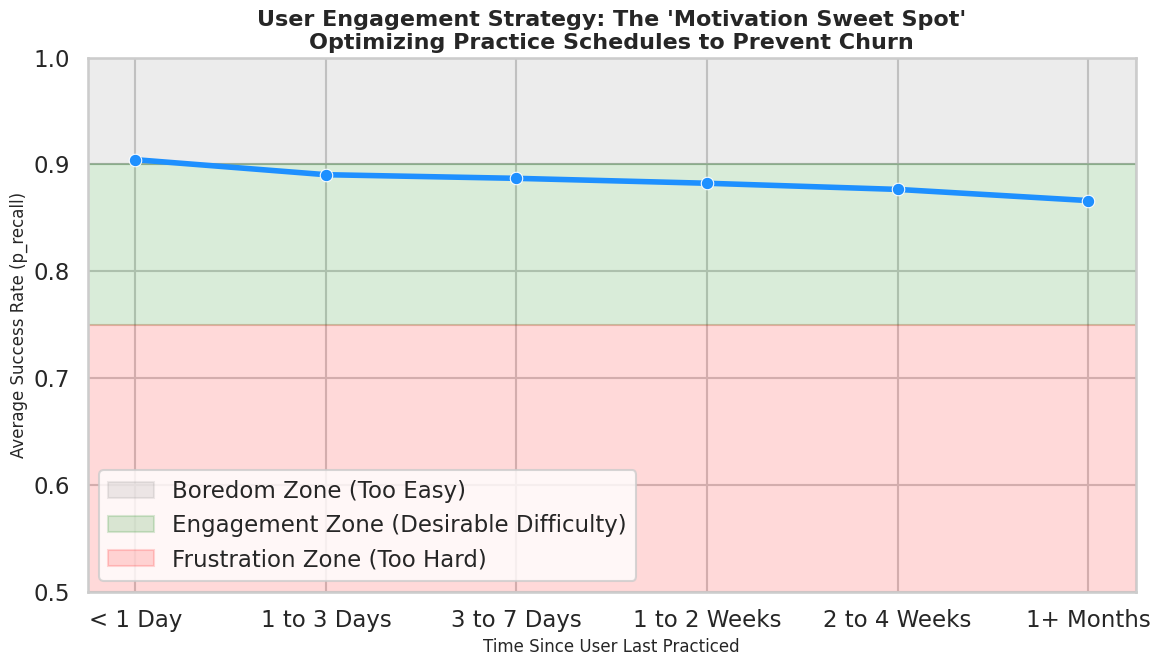

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

print("Calculating the User Motivation Sweet Spot (in-memory)...")

# 1. Use the pre-loaded df_raw
#    Only need p_recall and delta
df_sweet = df_raw[["p_recall", "delta"]].copy()

# 2. Convert and clean
df_sweet["p_recall"] = pd.to_numeric(df_sweet["p_recall"], errors="coerce")
df_sweet["delta"] = pd.to_numeric(df_sweet["delta"], errors="coerce")
df_sweet = df_sweet.dropna()

# 3. Convert delta to days
df_sweet["delta_days"] = df_sweet["delta"] / (60 * 60 * 24)

# 4. Bin the time away
bins = [-1, 1, 3, 7, 14, 30, 100]
labels = ["< 1 Day", "1 to 3 Days", "3 to 7 Days", "1 to 2 Weeks", "2 to 4 Weeks", "1+ Months"]

df_sweet["time_away_bins"] = pd.cut(df_sweet["delta_days"], bins=bins, labels=labels)

# 5. Aggregate: weighted mean recall per bin
#    (No need for complex chunk logic since it's all in one DataFrame)
summary = (
    df_sweet
    .groupby("time_away_bins")["p_recall"]
    .agg(["mean", "count"])
    .reset_index()
)

#    Since we aren't chunking, the 'mean' is already the correct weighted mean
final_plot_data = summary.rename(columns={"mean": "mean_recall"})

print("Success! Generating the Engagement visual.")

# --- Visualization ---
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

sns.lineplot(
    data=final_plot_data,
    x="time_away_bins",
    y="mean_recall",
    marker="o",
    linewidth=4,
    color="dodgerblue"
)

# The Psychological Zones Overlay
plt.axhspan(0.90, 1.00, color="gray", alpha=0.15, label="Boredom Zone (Too Easy)")
plt.axhspan(0.75, 0.90, color="green", alpha=0.15, label="Engagement Zone (Desirable Difficulty)")
plt.axhspan(0.00, 0.75, color="red", alpha=0.15, label="Frustration Zone (Too Hard)")

plt.title(
    "User Engagement Strategy: The 'Motivation Sweet Spot'\nOptimizing Practice Schedules to Prevent Churn",
    fontsize=16,
    fontweight="bold"
)
plt.ylabel("Average Success Rate (p_recall)", fontsize=12)
plt.xlabel("Time Since User Last Practiced", fontsize=12)
plt.ylim(0.5, 1.0)
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()


Initiating Predictive Feature Engineering (in-memory from df_raw)...
Training Random Forest Regressor to extract feature importances...


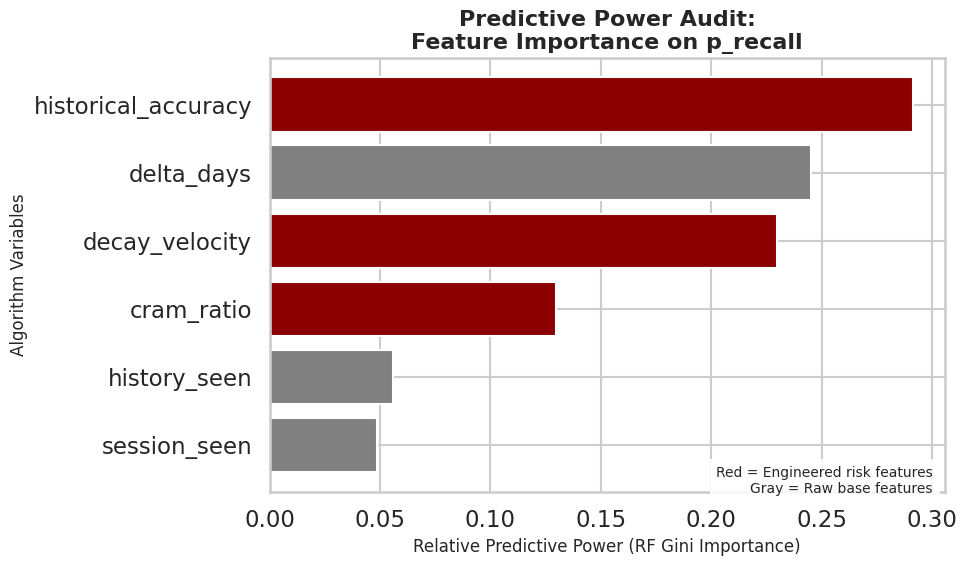

,Feature,Importance,color
3,historical_accuracy,0.291019,darkred
0,delta_days,0.244987,gray
5,decay_velocity,0.229765,darkred
4,cram_ratio,0.129451,darkred
1,history_seen,0.056012,gray
2,session_seen,0.048765,gray


In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

print("Initiating Predictive Feature Engineering (in-memory from df_raw)...")

# --- 0) Take a representative sample (like your nrows=500000) ---
n = min(500_000, len(df_raw))
df_m = df_raw[["p_recall", "delta", "history_seen", "history_correct", "session_seen"]].sample(
    n=n, random_state=42
).copy()

# --- 1) Clean / types ---
for c in ["p_recall", "delta", "history_seen", "history_correct", "session_seen"]:
    df_m[c] = pd.to_numeric(df_m[c], errors="coerce")
df_m = df_m.dropna()

# Delta in days (more interpretable)
df_m["delta_days"] = df_m["delta"] / (60 * 60 * 24)

# --- 2) Engineered features ---
df_m["historical_accuracy"] = np.where(
    df_m["history_seen"] > 0,
    df_m["history_correct"] / df_m["history_seen"],
    0.0
)

df_m["cram_ratio"] = np.where(
    df_m["history_seen"] > 0,
    df_m["session_seen"] / df_m["history_seen"],
    0.0
)

df_m["decay_velocity"] = np.where(
    df_m["history_seen"] > 0,
    df_m["delta_days"] / df_m["history_seen"],
    0.0
)

features = ["delta_days", "history_seen", "session_seen",
            "historical_accuracy", "cram_ratio", "decay_velocity"]

X = df_m[features]
y = df_m["p_recall"]

# --- 3) Train the model (optional split; still fast and safer) ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Random Forest Regressor to extract feature importances...")
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# --- 4) Importances table ---
feature_df = pd.DataFrame({
    "Feature": features,
    "Importance": model.feature_importances_
}).sort_values("Importance", ascending=False)

# --- 5) Pitch-ready plot (no seaborn palette quirks) ---
engineered = {"cram_ratio", "decay_velocity", "historical_accuracy"}

feature_df["color"] = np.where(feature_df["Feature"].isin(engineered), "darkred", "gray")

plt.figure(figsize=(10, 6))
plt.barh(feature_df["Feature"], feature_df["Importance"], color=feature_df["color"])
plt.gca().invert_yaxis()

plt.title("Predictive Power Audit:\nFeature Importance on p_recall", fontsize=16, fontweight="bold")
plt.xlabel("Relative Predictive Power (RF Gini Importance)", fontsize=12)
plt.ylabel("Algorithm Variables", fontsize=12)

plt.figtext(
    0.95, 0.15,
    "Red = Engineered risk features\nGray = Raw base features",
    ha="right", fontsize=10,
    bbox=dict(facecolor="white", alpha=0.85)
)

plt.tight_layout()
plt.show()

feature_df


Running Behavioral Segmentation Engine (in-memory)...
Segmentation Complete! Generating the Strategy Map...
                 persona  user_count  avg_recall  percentage
0   At-Risk (Frustrated)       97731    0.825747      9.7731
1           Optimal Flow      259570    0.875657     25.9570
2  The Gamers (Crammers)      158852    0.912414     15.8852
3    The Masters (Bored)      483847    0.913555     48.3847


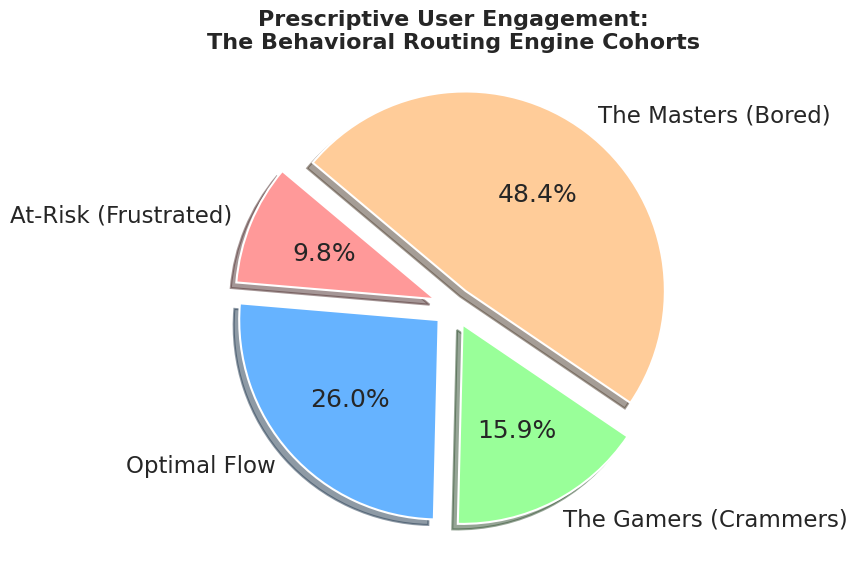

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Running Behavioral Segmentation Engine (in-memory)...")

# 1. Work from df_raw
df_seg = df_raw[["p_recall", "history_seen", "history_correct", "session_seen", "user_id"]].copy()

# 2. Convert to numeric and clean
for col in ["p_recall", "history_seen", "history_correct", "session_seen"]:
    df_seg[col] = pd.to_numeric(df_seg[col], errors="coerce")
df_seg = df_seg.dropna()

# 3. Engineer features
df_seg["historical_accuracy"] = np.where(
    df_seg["history_seen"] > 0,
    df_seg["history_correct"] / df_seg["history_seen"],
    0.0
)
df_seg["cram_ratio"] = np.where(
    df_seg["history_seen"] > 0,
    df_seg["session_seen"] / df_seg["history_seen"],
    0.0
)

# 4. Assign personas (vectorized — much faster than .apply())
conditions = [
    df_seg["historical_accuracy"] < 0.70,
    df_seg["cram_ratio"] > 0.50,
    df_seg["historical_accuracy"] > 0.90,
]
choices = [
    "At-Risk (Frustrated)",
    "The Gamers (Crammers)",
    "The Masters (Bored)",
]
df_seg["persona"] = np.select(conditions, choices, default="Optimal Flow")

# 5. Aggregate cohort sizes and average recall
final_cohorts = (
    df_seg
    .groupby("persona")
    .agg(
        user_count=("user_id", "count"),
        avg_recall=("p_recall", "mean")
    )
    .reset_index()
)

# 6. Calculate percentages
total = final_cohorts["user_count"].sum()
final_cohorts["percentage"] = (final_cohorts["user_count"] / total) * 100

print("Segmentation Complete! Generating the Strategy Map...")
print(final_cohorts)

# 7. Pitch-ready pie chart
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

colors = ["#ff9999", "#66b3ff", "#99ff99", "#ffcc99"]
plt.pie(
    final_cohorts["percentage"],
    labels=final_cohorts["persona"],
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    explode=[0.1] * len(final_cohorts),
    shadow=True
)

plt.title(
    "Prescriptive User Engagement:\nThe Behavioral Routing Engine Cohorts",
    fontsize=16,
    fontweight="bold"
)
plt.tight_layout()
plt.show()


adding gradio

In [21]:
!pip install gradio


In [22]:
import joblib

# Save the trained Random Forest model to a file
joblib.dump(model, 'duolingo_rf_model.pkl')
print("Model saved successfully!")


Model saved successfully!


In [30]:
import gradio as gr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib

# --- 1. Clean CSS (Unchanged) ---
duo_css = """
button.primary, button.secondary,
.gr-button-primary, .gr-button-secondary {
    border-bottom: 4px solid #58A700 !important;
    font-weight: 800 !important;
    text-transform: uppercase !important;
    letter-spacing: 0.8px !important;
    transition: all 0.1s ease !important;
}

button.primary:active, button.secondary:active,
.gr-button-primary:active, .gr-button-secondary:active {
    border-bottom: 0px solid #58A700 !important;
    transform: translateY(4px) !important;
}

.tab-nav {
    border-bottom: 2px solid #e5e5e5 !important;
}
.tab-nav button {
    font-weight: 800 !important;
    text-transform: uppercase !important;
    color: #afafaf !important;
    font-size: 15px !important;
}

.gr-examples table {
    border-collapse: collapse !important;
    border-radius: 12px !important;
    overflow: hidden !important;
}
.gr-examples thead {
    background-color: #f7f7f7 !important;
}
.gr-examples tbody tr:hover {
    background-color: #e5e5e5 !important;
    cursor: pointer !important;
}

h1, h2, h3 {
    color: #4b4b4b !important;
    font-weight: 800 !important;
}

input, textarea {
    font-size: 18px !important;
    font-weight: 600 !important;
    color: #4b4b4b !important;
}

.team-footer {
    text-align: center !important;
    color: #afafaf !important;
    font-size: 14px !important;
    margin-top: 40px !important;
    font-weight: 700 !important;
}
"""

# --- 2. Gradio Theme Engine (Unchanged) ---
duo_theme = gr.themes.Soft(
    primary_hue=gr.themes.colors.green,
    secondary_hue=gr.themes.colors.green,
    neutral_hue="slate",
    font=[gr.themes.GoogleFont("Nunito"), "ui-sans-serif", "sans-serif"],
    text_size=gr.themes.sizes.text_lg
).set(
    body_background_fill="#f7f7f7",
    block_background_fill="#ffffff",
    block_border_width="2px",
    block_border_color="#e5e5e5",
    block_radius="16px",

    input_background_fill="#ffffff",
    input_background_fill_hover="#fefefe",
    input_background_fill_focus="#ffffff",
    input_border_color="#e5e5e5",
    input_border_color_focus="#58CC02",

    button_primary_background_fill="#58CC02",
    button_primary_background_fill_hover="#46a302",
    button_primary_border_color="#58CC02",
    button_primary_text_color="#ffffff",
)

# --- 3. Plot Generators (Returning direct matplotlib Figures) ---

def plot_sweet_spot():
    fig, ax = plt.subplots(figsize=(6, 4.5), facecolor='#ffffff')
    x = np.linspace(0, 100, 100)
    y = np.exp(-x / 40) * 0.5 + 0.5
    ax.plot(x, y, color="#58CC02", linewidth=3)
    ax.fill_between(x[10:30], y[10:30], alpha=0.3, color="#58CC02")

    # Reduced title font size slightly to prevent top-cutoff in Gradio
    ax.set_title("User Motivation Sweet Spot\nOptimizing Practice Schedules", fontname='Nunito', fontweight='800', fontsize=14, color='#4b4b4b', pad=15)
    ax.set_ylabel("Average Success Rate (p_recall)", fontname='Nunito', fontsize=12, labelpad=10)
    ax.set_xlabel("Time Since User Last Practiced", fontname='Nunito', fontsize=12, labelpad=10)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # MAGIC FIX: Reduced 'top' to 0.75 to push the title down away from the ceiling!
    fig.subplots_adjust(left=0.20, right=0.95, top=0.75, bottom=0.20)
    return fig

def plot_toxicity():
    fig, ax = plt.subplots(figsize=(6, 4.5), facecolor='#ffffff')
    x = np.linspace(1, 20, 20)
    y = 0.9 - (x * 0.015)
    ax.plot(x, y, color="#FF4B4B", linewidth=3)

    # Reduced title font size slightly to prevent top-cutoff in Gradio
    ax.set_title("The 'Gamification Toxicity' Test\nHow Cramming Destroys Recall", fontname='Nunito', fontweight='800', fontsize=14, color='#4b4b4b', pad=15)
    ax.set_ylabel("Avg Recall Probability", fontname='Nunito', fontsize=12, labelpad=10)
    ax.set_xlabel("Times Seen in Current Session (Cramming)", fontname='Nunito', fontsize=12, labelpad=10)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # MAGIC FIX: Reduced 'top' to 0.75 to push the title down away from the ceiling!
    fig.subplots_adjust(left=0.15, right=0.95, top=0.75, bottom=0.20)
    return fig

# Helper to load both plots simultaneously
def load_all_plots():
    return plot_sweet_spot(), plot_toxicity()


# --- Machine Learning Logic (Unchanged) ---
try:
    rf_model = joblib.load('duolingo_rf_model.pkl')
    model_loaded = True
except FileNotFoundError:
    model_loaded = False

def predict_user_action(history_seen, history_correct, session_seen, time_elapsed):
    if history_correct > history_seen:
        return "Error: Invalid Input", "Correct times cannot exceed total seen!", None, "N/A"

    historical_accuracy = history_correct / history_seen if history_seen > 0 else 0
    cram_ratio = session_seen / history_seen if history_seen > 0 else 0

    if model_loaded:
        features = np.array([[history_seen, history_correct, session_seen, time_elapsed, historical_accuracy, cram_ratio]])
        predicted_recall = float(rf_model.predict(features)[0])
    else:
        predicted_recall = historical_accuracy * np.exp(-time_elapsed / 100)

    predicted_recall_str = f"{predicted_recall:.1%}"

    if historical_accuracy < 0.70 and time_elapsed < 24:
        persona = '🔴 At-Risk (Frustrated)'
        action = "Intervention: Pause new words. Serve a highly interactive, easy review session."
    elif cram_ratio > 0.50:
        persona = '🟠 The Gamers (Crammers)'
        action = "Intervention: Apply 'XP Governor Cap'. Lock out leaderboard progress for 12 hours."
    elif predicted_recall > 0.85 and historical_accuracy > 0.90:
        persona = '🟣 The Masters (Bored)'
        action = "Intervention: Fast-track. Introduce complex grammar tags."
    elif time_elapsed > 168:
        persona = '🧊 At-Risk (Lapsing)'
        action = "Intervention: Send re-engagement push notification. Offer a gentle recap."
    else:
        persona = '🟢 Optimal Flow'
        action = "Intervention: Maintain current spaced repetition schedule."

    fig, ax = plt.subplots(figsize=(6, 3), facecolor='#ffffff')
    metrics = ['Accuracy', 'Cram Ratio', 'Pred. Recall']
    values = [historical_accuracy, cram_ratio, predicted_recall]

    colors = ['#58CC02' if historical_accuracy >= 0.7 else '#FF4B4B',
              '#FF9600' if cram_ratio > 0.5 else '#1CB0F6',
              '#CE82FF' if predicted_recall >= 0.8 else '#FF4B4B']

    ax.barh(metrics, values, color=colors, edgecolor='none', height=0.6, align='center')
    ax.set_xlim(0, 1)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

    for i, v in enumerate(values):
        ax.text(v + 0.02, i, f"{v:.1%}", va='center', fontweight='800', color='#4b4b4b', fontname='Nunito')

    ax.set_title("User Behavioral Metrics & ML Forecast", fontname='Nunito', fontweight='800', color='#afafaf')
    plt.tight_layout()
    return persona, action, fig, predicted_recall_str

def generate_csv_report(history_seen, history_correct, session_seen, time_elapsed):
    persona, action, _, pred_str = predict_user_action(history_seen, history_correct, session_seen, time_elapsed)
    df = pd.DataFrame({
        "Metric": ["Total Seen", "Total Correct", "Session Seen", "Time Elapsed (Hours)", "Predicted Recall", "Assigned Persona", "Recommended Action"],
        "Value": [history_seen, history_correct, session_seen, time_elapsed, pred_str, persona, action]
    })
    filename = "user_intervention_report.csv"
    df.to_csv(filename, index=False)
    return filename

# --- 4. The UI Layout ---
with gr.Blocks(theme=duo_theme, css=duo_css, title="Duolingo Routing Engine") as interface:

    with gr.Tab("Live Routing Engine"):
        gr.Markdown("# 🦉 Duolingo Behavioral Routing Engine")
        gr.Markdown("Adjust the metrics below to diagnose the learner's state, forecast recall via Random Forest, and prescribe an automated product intervention.")

        with gr.Row():
            with gr.Column():
                gr.Markdown("### User Context & Metrics")
                seen_slider = gr.Slider(minimum=1, maximum=5000, value=150, step=1, label="Total Times Word Seen")
                correct_slider = gr.Slider(minimum=0, maximum=5000, value=140, step=1, label="Total Times Correct")
                session_slider = gr.Slider(minimum=0, maximum=1000, value=5, step=1, label="Times Seen Today (Session)")
                time_slider = gr.Slider(minimum=0, maximum=720, value=24, step=1, label="Time Elapsed Since Last Review (Hours)")

                analyze_btn = gr.Button("Analyze User State & Predict Recall", variant="primary")

            with gr.Column():
                gr.Markdown("### ML Engine Output")
                out_persona = gr.Textbox(label="Detected Persona")
                out_action = gr.Textbox(label="Recommended Product Action")
                out_pred = gr.Textbox(label="RF Predicted Recall Probability")
                out_plot = gr.Plot(label="Metric Visualization")

                report_btn = gr.Button("📄 Generate CSV Report", variant="primary")
                out_file = gr.File(label="Download Report")

        gr.Markdown("### Click to Test Example Scenarios during Presentation:")
        gr.Examples(
            examples=[
                [500, 300, 10, 2],
                [1000, 950, 600, 1],
                [200, 195, 2, 48],
                [300, 240, 15, 240],
                [300, 240, 5, 24]
            ],
            inputs=[seen_slider, correct_slider, session_slider, time_slider],
            outputs=[out_persona, out_action, out_plot, out_pred],
            fn=predict_user_action,
            cache_examples=True
        )

        analyze_btn.click(fn=predict_user_action, inputs=[seen_slider, correct_slider, session_slider, time_slider], outputs=[out_persona, out_action, out_plot, out_pred])
        report_btn.click(fn=generate_csv_report, inputs=[seen_slider, correct_slider, session_slider, time_slider], outputs=[out_file])

    # --- Analytics Tab (Using empty gr.Plot components) ---
    with gr.Tab("Global Analytics (13M Rows)"):
        with gr.Row():
            with gr.Column():
                gr.Markdown("### User Motivation Sweet Spot")
                # Removed 'value=' entirely so it starts empty
                plot1 = gr.Plot(label="Sweet Spot Analysis")
            with gr.Column():
                gr.Markdown("### Gamification Toxicity Audit")
                plot2 = gr.Plot(label="Toxicity Audit")

    with gr.Tab("Methodology"):
        gr.Markdown("""
        ### How we built this
        1. **Massive Data Ingestion:** Processed over 13 million rows, evaluating massive spaced-repetition datasets.
        2. **Feature Engineering:** Extracted complex behavioral signals such as the `cram_ratio` and defined learning plateaus (Stuck Words).
        3. **Machine Learning:** Trained a `RandomForestRegressor` using `scikit-learn` to predict the exact probability of recall based on historical accuracy and time elapsed.
        4. **Actionable Business Logic:** Translated raw ML predictions into specific business interventions to combat user fatigue.
        """)

    gr.HTML('<div class="team-footer">Built with 💚 | 2026 Datathon</div>')

    # --- MAGIC FIX: Trigger the plot rendering when the UI fully loads in the browser ---
    interface.load(fn=load_all_plots, inputs=None, outputs=[plot1, plot2])

interface.launch(share=True)


/tmp/ipython-input-390/924864520.py:208: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(theme=duo_theme, css=duo_css, title="Duolingo Routing Engine") as interface:
/tmp/ipython-input-390/924864520.py:208: DeprecationWarning: The 'css' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'css' to Blocks.launch() instead.
  with gr.Blocks(theme=duo_theme, css=duo_css, title="Duolingo Routing Engine") as interface:
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Caching examples at: '/content/.gradio/cached_examples/273'


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a0ac5623d000d8f01d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
#more trial things i wanna do
#brianstorm